In [22]:
import pandas as pd
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import seaborn as sns
import matplotlib.pyplot as plt

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


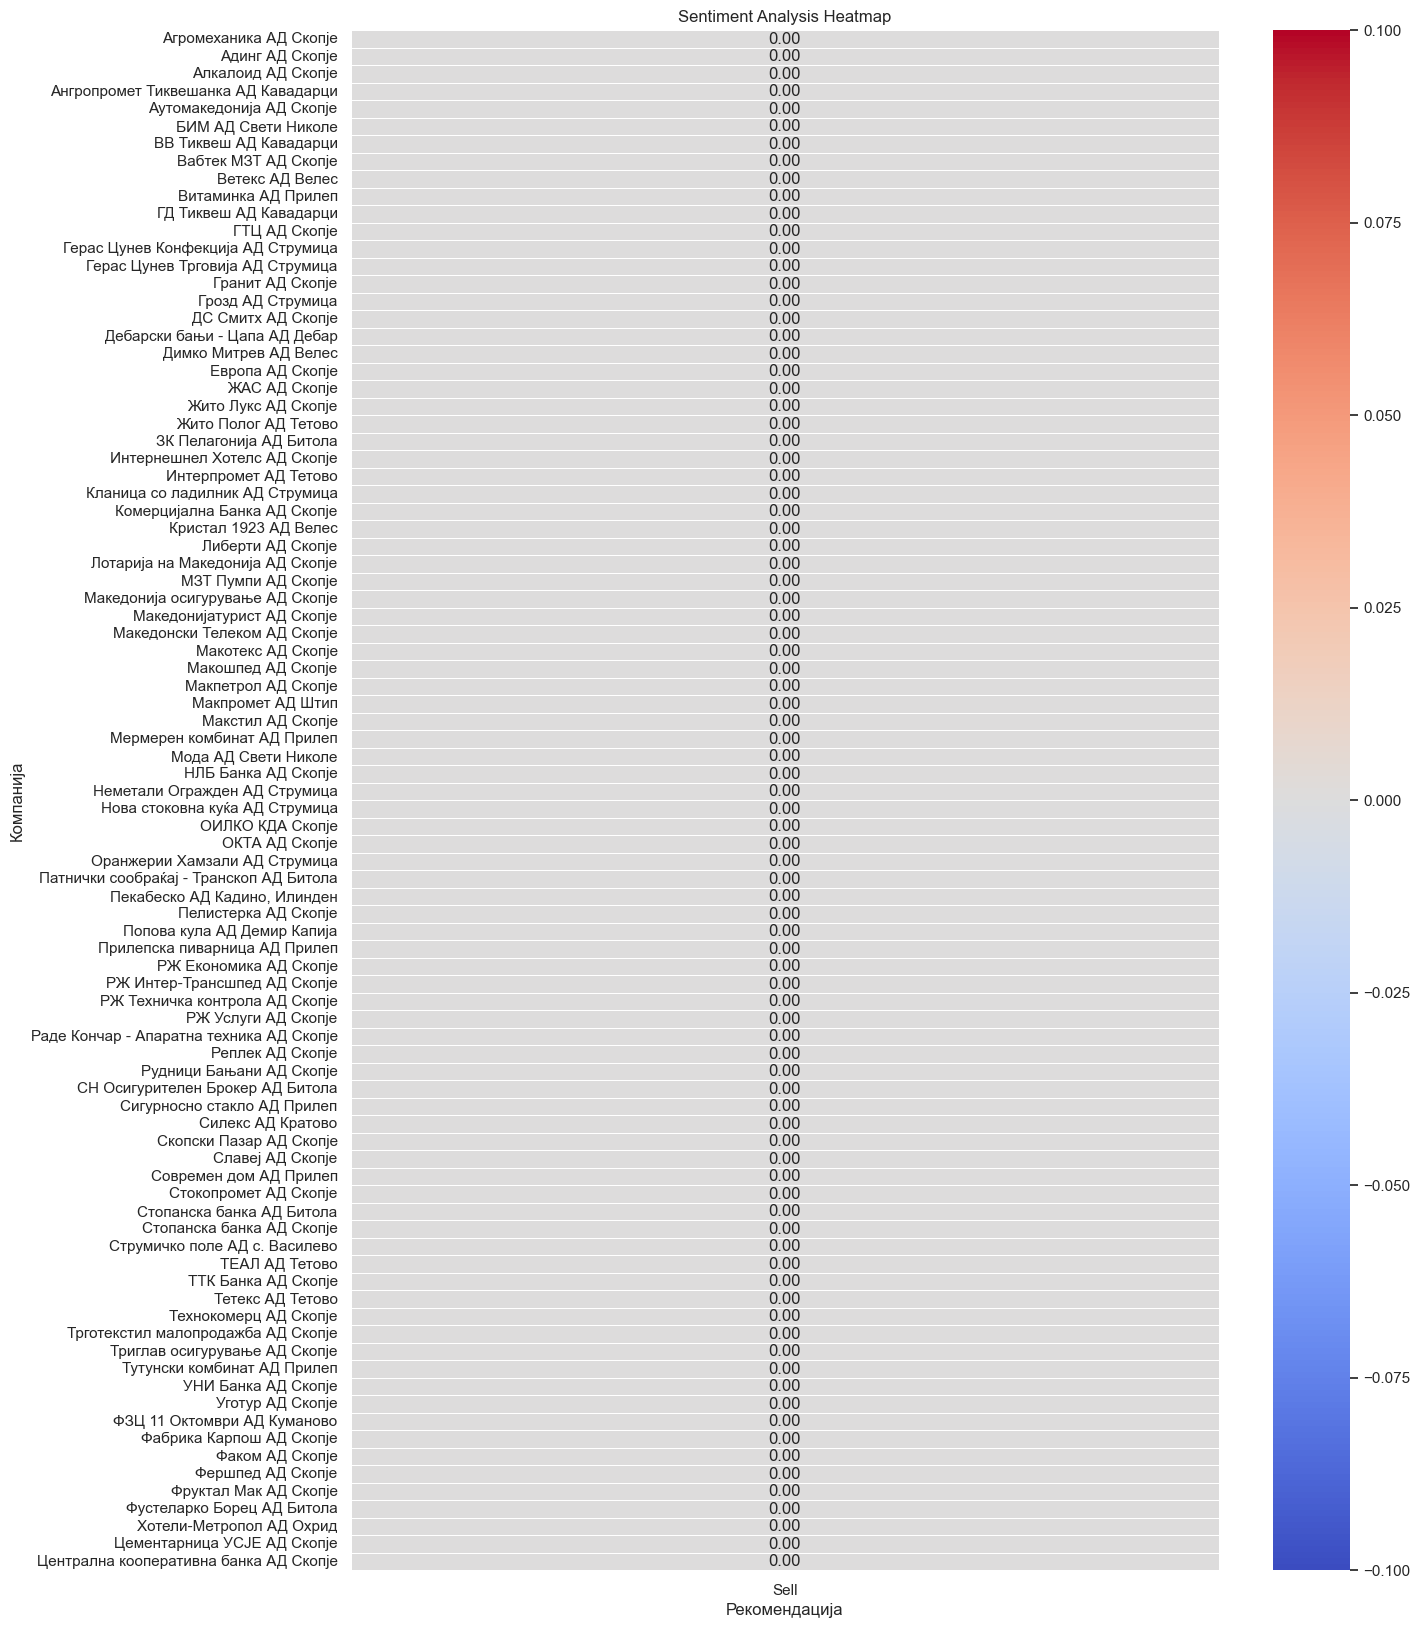

Сите податоци се анализирани, зачувани во CSV фајл и визуализирани со топлотна мапа.


In [21]:
data = pd.read_csv('companies_with_news.csv')

data = data.dropna(subset=['Опис'])

grouped_data = data.groupby('Компанија')

nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()

def analyze_sentiment(description):
    sentiment = sia.polarity_scores(description)
    return sentiment['compound']

recommendations = []
for name, group in grouped_data:
    group['Sentiment'] = group['Опис'].apply(analyze_sentiment)
    positive_news = group[group['Sentiment'] > 0]
    negative_news = group[group['Sentiment'] <= 0]
    
    sentiment_score = group['Sentiment'].mean()
    recommendation = 'Buy' if sentiment_score > 0 else 'Sell'
    
    recommendations.append({
        'Компанија': name,
        'Средна оценка за сентимент': sentiment_score,
        'Рекомендација': recommendation
    })

recommendations_df = pd.DataFrame(recommendations)

recommendations_df.to_csv('C:/Users/User/Desktop/recommendations.csv', index=False)

plt.figure(figsize=(14, 20))
heatmap_data = recommendations_df.pivot(index="Компанија", columns="Рекомендација", values="Средна оценка за сентимент")
sns.heatmap(heatmap_data, annot=True, fmt=".2f", cmap="coolwarm", linewidths=.5)
plt.title('Sentiment Analysis Heatmap')
plt.xlabel('Рекомендација')
plt.ylabel('Компанија')
plt.show()